# Parte 1

### Normalización de ambos trimestres completos

In [9]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (TADEO)
import pandas as pd

T1_24=pd.read_excel('/Users/tadeo/OneDrive - Económicas - UBA/ECONOMÍA/BIG DATA/base de datos/usu_individual_T124.xlsx')

T1_04=pd.read_stata("/Users/tadeo/OneDrive - Económicas - UBA/ECONOMÍA/BIG DATA/base de datos/usu_individual_T104.dta")


In [247]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (PABLO)
import pandas as pd

T1_24=pd.read_excel("C:/Users/Computador/Desktop/Facultad/Big Data/TP2_Introducción a la EPH/usu_individual_T124.xlsx")

T1_04=pd.read_stata("C:/Users/Computador/Desktop/Facultad/Big Data/TP2_Introducción a la EPH/usu_individual_T104.dta")


In [ ]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (LEANDRO)
import pandas as pd

T1_24=pd.read_excel("/Users/HP/Desktop/Bases de datos tp2/usu_individual_T124.xlsx")

T1_04=pd.read_stata("/Users/HP/Desktop/Bases de datos tp2/usu_individual_T104.dta")

In [249]:
# PONGO EN MAYUSCULA TODAS LAS COLUMNAS
import numpy as np

T1_04.columns = T1_04.columns.str.upper()
T1_24.columns = T1_24.columns.str.upper()

# GUARDO LAS COLUMNAS QUE TIENEN EN COMUN
columnas_comunes = T1_04.columns.intersection(T1_24.columns)

T1_04_comun = T1_04[columnas_comunes]
T1_24_comun = T1_24[columnas_comunes]


# PRIMERA NORMALIZACION DE DATOS
SI_NO_DICCIONARIO = {"Sí":1, "No":2, "Ns./Nr.":9, 0.0:np.nan}

cols_a_convertir_SIyNO = [
    "H15", "CH13", "PP02C1", "PP02C2", "PP02C3", "PP02C4", "PP02C5",
    "PP02C6", "PP02C7", "PP02C8", "PP02H", "PP02I", "PP03G", "PP03I", "PP03J",
    "PP05E", "PP06A", "PP06H", "PP07F1", "PP07F2", "PP07F3", "PP07F4",
    "PP07G1", "PP07G2", "PP07G3", "PP07G4", "PP07H", "PP07I", "PP09B",
    "PP10C", "PP10D", "PP11N", "PP11P", "PP11Q", "PP11R", "PP11S", "PP11T"
]

T1_04_comun[cols_a_convertir_SIyNO] = T1_04_comun[cols_a_convertir_SIyNO].astype("object")
#REEMPLAZO EL DICCIONARIO EN LA COLUMNA
T1_04_comun[cols_a_convertir_SIyNO] = T1_04_comun[cols_a_convertir_SIyNO].replace(SI_NO_DICCIONARIO)

# ALGUNAS COLUMNAS TENIAN A NUMEROS COMO STRING:
cols_a_convertir_NUM = [
    "CH14", "CH15_COD", "CH16_COD", "PP04B_COD", "PP04D_COD",
    "PP11B_COD", "PP11D_COD", "DECOCUR", "IDECOCUR", "RDECOCUR",
    "GDECOCUR", "PDECOCUR", "ADECOCUR", "DECINDR", "IDECINDR",
    "RDECINDR", "GDECINDR", "PDECINDR", "ADECINDR", "DECIFR",
    "IDECIFR", "RDECIFR", "GDECIFR", "PDECIFR", "ADECIFR",
    "IDECCFR", "RDECCFR", "GDECCFR", "PDECCFR", "ADECCFR"
]

T1_04_comun[cols_a_convertir_NUM] = (
    T1_04_comun[cols_a_convertir_NUM]
    .apply(pd.to_numeric, errors="coerce")
    .astype("Int64")
)

T1_24_comun[cols_a_convertir_NUM] = (
    T1_24_comun[cols_a_convertir_NUM]
    .apply(pd.to_numeric, errors="coerce")
    .astype("Int64")
)

# AHORA SI, UNO LAS DOS BASES
T1_ARG = pd.concat([T1_04_comun, T1_24_comun], ignore_index=True)


C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\1310866052.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T1_04_comun[cols_a_convertir_SIyNO] = T1_04_comun[cols_a_convertir_SIyNO].astype("object")
C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\1310866052.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1_04_comun[cols_a_convertir_SIyNO] = T1_04_comun[cols_a_convertir_SIyNO].replace(SI_NO_DICCIONARIO)
C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\1310866052.py:27: SettingWithCopyWarning: 

In [251]:
# REEMPLAZO TODOS LOS 0.0 (NO DEBERIA RESPONDER) POR NaN
T1_ARG.replace(0.0, np.nan, inplace=True)

# CONVIERTO TODAS LAS FLOAT A INTEGER
float_cols = T1_ARG.select_dtypes(include='float64').columns
for col in float_cols:
    try:
        T1_ARG[col] = T1_ARG[col].astype('Int64')
    except Exception as e:
        pass

In [253]:
# TODA LA NORMALIZACION QUE SE HIZO Y SE HARA SE GUIA POR ESTE CODIGO:
for i in T1_ARG.select_dtypes(include='object').columns:
    print(i,":")
    print(T1_ARG[i].unique())
    print()

CODUSU :
['125098  ' '125397  ' '125515  ' ... 'TQRMNOPSYHJLOQCDEIIAD00794774'
 'TQRMNOSXVHJKKMCDEIJAH00794775' 'TQRMNOPUQHKMKNCDEIJAH00861661']

COMPONENTE :
[1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 'Servicio doméstico en hogares' 9.0 10.0
 11.0 12.0 13.0 14.0 15.0 'Pensionistas en hogares' 16.0 17.0 18.0 19.0
 20.0 21.0 22.0 23.0]

TRIMESTRE :
['1er. Trimestre' 1]

REGION :
['Gran Buenos Aires' 'NOA' 'NEA' 'Cuyo' 'Pampeana' 'Patagónica' 42 41 40
 43 44 1]

MAS_500 :
['S' 'N']

AGLOMERADO :
['Ciudad de Buenos Aires' 'Partidos del GBA'
 'Santiago del Estero - La Banda' 'Jujuy - Palpalá' 'Gran Catamarca'
 'Salta' 'La Rioja' 'Gran Tucumán - Tafí Viejo' 'Posadas'
 'Gran Resistencia' 'Corrientes' 'Formosa' 'Gran Mendoza'
 'San Luis - El Chorrillo' 'Gran San Juan' 'Gran La Plata'
 'Bahía Blanca - Cerri' 'Gran Rosario' 'Gran Santa Fe' 'Gran Paraná'
 'Gran Córdoba' 'Concordia' 'Santa Rosa - Toay' 'Mar del Plata - Batán'
 'Río Cuarto' 'Comodoro Rivadavia - Rada Tilly' 'Neuquén - Plottier'
 'Río Galleg

### NORMALIZACIONES RESTANTES

In [255]:
# SEGUNDA NORMALIZACION

T1_ARG["ANO4"] = T1_ARG["ANO4"].astype("int64")

# CREO DICCIONARIO DONDE CAMBIO LOS VALORES
AGLOMERADO_B = {
    "Gran La Plata": 2,
    "Bahía Blanca - Cerri": 3,
    "Gran Rosario": 4,
    "Gran Santa Fe": 5,
    "Gran Paraná": 6,
    "Posadas": 7,
    "Gran Resistencia": 8,
    'Comodoro Rivadavia - Rada Tilly': 9,
    "Gran Mendoza": 10,
    "Corrientes": 12,
    "Gran Córdoba": 13,
    "Concordia": 14,
    "Formosa": 15,
    'Neuquén - Plottier': 17,
    "Santiago del Estero - La Banda": 18,
    "Jujuy - Palpalá": 19,
    "Río Gallegos": 20,
    "Gran Catamarca": 22,
    "Salta": 23,
    "La Rioja": 25,
    "San Luis - El Chorrillo": 26,
    "Gran San Juan": 27,
    "Gran Tucumán - Tafí Viejo": 29,
    "Santa Rosa - Toay": 30,
    "Ushuaia - Río Grande": 31,
    "Ciudad de Buenos Aires": 32,
    "Partidos del GBA": 33,
    "Mar del Plata - Batán": 34,
    "Río Cuarto": 36}

T1_ARG["AGLOMERADO"] = T1_ARG["AGLOMERADO"].replace(AGLOMERADO_B)

CH04_B = {                                                                   
    "Varón":1,
    "Mujer":2
}
T1_ARG["CH04"] = T1_ARG["CH04"].replace(CH04_B)

CH06_B = {
    "Menos de 1 año":-1,
    "98 y más años":98
}
T1_ARG["CH06"] = T1_ARG["CH06"].replace(CH06_B)                      

CH07_B = {
    "Unido":1,
    "Casado":2,
    "Separado o divorciado":3,
    "Viudo":4,
    "Soltero":5,
    "Ns./Nr.":9  
}
T1_ARG["CH07"] = T1_ARG["CH07"].replace(CH07_B)

CH08_B = {
    "Obra social (incluye PAMI)":1,
    "Mutual/Prepaga/Servicio de emergencia":2,
    "Planes y seguros públicos":3,
    "No paga ni le descuentan":4,
    "Ns./Nr.":np.nan,
    "Obra social y mutual/prepaga/servicio de emergencia":12,
    "Obra social y planes y seguros públicos":13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi":23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes":123,
    9:np.nan
}
T1_ARG["CH08"] = T1_ARG["CH08"].replace(CH08_B)

CH09_B = {
    "Sí":1,
    "No":2,
    "Menor de 2 años":3,
    "Ns./Nr.":np.nan 
}
T1_ARG["CH09"] = T1_ARG["CH09"].replace(CH09_B)

NIVEL_ED_B = {
    "Primaria Incompleta (incluye educación especial)":1,
    "Primaria Completa":2,
    "Secundaria Incompleta":3,
    "Secundaria Completa":4,
    "Superior Universitaria Incompleta":5,
    "Superior Universitaria Completa":6,
    "Sin instrucción":7,
    "Ns./Nr.":np.nan 
}
T1_ARG["NIVEL_ED"] = T1_ARG["NIVEL_ED"].replace(NIVEL_ED_B)

ESTADO_B = {
    "Entrevista individual no realizada (no respuesta al cuestion":np.nan,
    "Ocupado":1,
    "Desocupado":2,
    "Inactivo":3,
    "Menor de 10 años":4,
    0:np.nan
}
T1_ARG["ESTADO"] = T1_ARG["ESTADO"].replace(ESTADO_B)

CAT_OCUP_B = {
    "Patrón":1,
    "Cuenta propia":2,
    "Obrero o empleado":3,
    "Trabajador familiar sin remuneración":4
}
T1_ARG["CAT_OCUP"] = T1_ARG["CAT_OCUP"].replace(CAT_OCUP_B)

CAT_INAC_B = {
    "Jubilado/pensionado":1,
    "Rentista":2,
    "Estudiante":3,
    "Ama de casa":4,
    "Menor de 6 años":5,
    "Discapacitado":6,
    "Otros":7
}
T1_ARG["CAT_INAC"] = T1_ARG["CAT_INAC"].replace(CAT_INAC_B)

DECCFR_B = {
    "01":1,
    "02":2,
    "03":3,
    "04":4,
    "05":5,
    "06":6,
    "07":7,
    "08":8,
    "09":9,
    "10":10,
    "00":np.nan,
    0:np.nan,
    12:np.nan
}
T1_ARG["DECCFR"] = T1_ARG["DECCFR"].replace(DECCFR_B)

IPCF_B = {
    0:np.nan
}
T1_ARG["IPCF"] = T1_ARG["IPCF"].replace(IPCF_B)


C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\607127782.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1_ARG["AGLOMERADO"] = T1_ARG["AGLOMERADO"].replace(AGLOMERADO_B)
C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\607127782.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1_ARG["CH04"] = T1_ARG["CH04"].replace(CH04_B)
C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\607127782.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

In [257]:
# TERCERA NORMALIZACION
COMPONENTE_B={'Servicio doméstico en hogares':51, 'Pensionistas en hogares':71}
T1_ARG["COMPONENTE"] = T1_ARG["COMPONENTE"].replace(COMPONENTE_B).astype("Int64")

TRIMESTRE_B = {'1er. Trimestre':1}
T1_ARG["TRIMESTRE"] = T1_ARG["TRIMESTRE"].replace(TRIMESTRE_B)

REGION_B={'Gran Buenos Aires':1, 'NOA':40, 'NEA':41, 'Cuyo':42, 'Pampeana':43, 'Patagónica':44}
T1_ARG["REGION"] = T1_ARG["REGION"].replace(REGION_B)

CH03_B={"Jefe": 1, "Cónyuge/Pareja": 2, "Hijo/Hijastro": 3, "Yerno/Nuera": 4, "Nieto": 5,
        "Madre/Padre": 6, "Suegro": 7, "Hermano": 8, "Otros familiares": 9, "No familiares": 10}
T1_ARG["CH03"] = T1_ARG["CH03"].replace(CH03_B)

CH10_B={'No asiste, pero asistió':2, 'Sí, asiste':1, 'Nunca asistió':3, 'Ns./Nr.':9, np.nan:np.nan}
T1_ARG["CH10"] = T1_ARG["CH10"].replace(CH10_B)

CH11_B={'Público':1, 'Privado':2, np.nan:np.nan}
T1_ARG["CH11"] = T1_ARG["CH11"].replace(CH11_B)

CH12_B={"Secundario": 4, "Primario": 2, "Universitario": 7, "Terciario": 6, np.nan: np.nan,
        "Jardín/Preescolar": 1, "Polimodal": 5, "EGB": 3, "Educación especial (discapacitado)": 9,
        "Ns./Nr.": 99, "Posgrado Universitario": 8}
T1_ARG["CH12"] = T1_ARG["CH12"].replace(CH12_B)

CH15_B={'En esta localidad':1, 'En otra localidad':2, 'En otra provincia (especificar)':3,
        'En un país limítrofe':4, 'En otro país':5, 'Ns./Nr.':9}
T1_ARG["CH15"] = T1_ARG["CH15"].replace(CH15_B)

CH16_B={"En esta localidad": 1, "En un país limítrofe": 4, "No había nacido": 6,
        "En otra localidad de esta provincia": 2, "En otra provincia (especificar)": 3,
        "En otro país": 5, "Ns./Nr.": 9}
T1_ARG["CH16"] = T1_ARG["CH16"].replace(CH16_B)

PP02E_B={'Se cansó de buscar trabajo': 3, 'Por otras razones': 5, 'Hay poco trabajo en esta época del año': 4,
         'Ya tiene trabajo asegurado': 2, 'Está suspendido': 1, np.nan: np.nan}
T1_ARG["PP02E"] = T1_ARG["PP02E"].replace(PP02E_B)

PP03C_B={np.nan:np.nan, '...un sólo empleo/ocupación/actividad?':1,
         '...más de un empleo/ocupación/actividad?':2, 'Ns./Nr.':9}
T1_ARG["PP03C"] = T1_ARG["PP03C"].replace(PP03C_B).astype("Int64")

PP03H_B={'...podía trabajarlas esa semana?':1, '...no podía trabajar más horas?':3,
 '...podía empezar a trabajarlas en dos semanas a más tardar?':2, 'Ns./Nr.':9}
T1_ARG["PP03H"] = T1_ARG["PP03H"].replace(PP03H_B).astype("Int64")

INTENSI_B={'Ocupado que no trabajó en la semana':4, 'Sobreocupación horaria':3,
           'Subocupación horaria No Demandante':1, 'Ocupación plena':2,
           'Subocupación horaria Demandante':1, 'Ns./Nr.':9}
T1_ARG["INTENSI"] = T1_ARG["INTENSI"].replace(INTENSI_B).astype("Int64")

PP04A_B={'...privada?':2, '...estatal?':1, '...de otro tipo? (especificar)':3, 'Ns./Nr.':9, np.nan:np.nan}
T1_ARG["PP04A"] = T1_ARG["PP04A"].replace(PP04A_B).astype("Int64")

PP04B1_B={'Casa de familia':1, 2.0:np.nan, np.nan:np.nan, 1.0:1}
T1_ARG["PP04B1"] = T1_ARG["PP04B1"].replace(PP04B1_B).astype("Int64")

PP04C_B={ '1 persona': 1, '2 personas': 2, '3 personas': 3, '4 personas': 4, '5 personas': 5,
          'de 6 a 10 personas': 6, 'de 11 a 25 personas': 7, 'de 26 a 40 personas': 8,
          'de 41 a 100 personas': 9, 'de 101 a 200 personas': 10, 'de 201 a 500 personas': 11,
          'más de 500 personas': 12, 'Ns./Nr.': 99, np.nan: np.nan}
T1_ARG["PP04C"] = T1_ARG["PP04C"].replace(PP04C_B).astype("Int64")

PP04C99_B={'De 6 a 40':2,'Más de 40':3, 'Ns./Nr.':9, 'Hasta 5':1}
T1_ARG["PP04C99"] = T1_ARG["PP04C99"].replace(PP04C99_B).astype("Int64")

PP04G_B={ 'En un local/oficina/establecimiento/negocio/taller/chacra/fi': 1,
          'En puesto o kiosco fijo callejero': 2,
          'En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser': 3,
          'En vehículo para transporte de personas y mercaderías-aéreo,': 4,
          'En obras en construcción, de infraestructura, minería o simi': 5,
          'En esta vivienda': 6, 'En la vivienda del socio o del patrón': 7,
          'En el domicilio/local de los clientes': 8,
          'En la calle/espacios públicos/ambulante/de casa en casa/pues': 9,
          'En otro lugar': 10, 'Ns./Nr.': 99, np.nan: np.nan }
T1_ARG["PP04G"] = T1_ARG["PP04G"].replace(PP04G_B).astype("Int64")

PP05C_1_B={'Propio (del negocio)': 1, 'Prestado/alquilado': 2, 'No tiene': 3, 'Ns./Nr.': 9, np.nan: np.nan}
T1_ARG["PP05C_1"] = T1_ARG["PP05C_1"].replace(PP05C_1_B).astype("Int64")

PP05C_2_B=PP05C_1_B.copy()
T1_ARG["PP05C_2"] = T1_ARG["PP05C_2"].replace(PP05C_2_B).astype("Int64")

PP05C_3_B=PP05C_1_B.copy()
T1_ARG["PP05C_3"] = T1_ARG["PP05C_3"].replace(PP05C_3_B).astype("Int64")

PP05F_B={'Un solo cliente? (persona, empresa)': 6, 'Distintos clientes? (incluye público en general)': 7,
         'Ns./Nr.': 99, np.nan: np.nan}
T1_ARG["PP05F"] = T1_ARG["PP05F"].replace(PP05F_B).astype("Int64")

PP05H_B={ 'Menos de un mes': 1, 'De 1 a 3 meses': 2, 'Más de 3 a 6 meses': 3, 'Más de 6 meses a 1 año': 4,
          'Más de 1 a 5 años': 5, 'Más de 5 años': 6, 'Ns./Nr.': 9, np.nan: np.nan }
T1_ARG["PP05H"] = T1_ARG["PP05H"].replace(PP05H_B).astype("Int64")

PP06E_B={ 'Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co': 1,
          'Es una sociedad de otra forma legal?': 2,
          'O es una sociedad convenida de palabra?': 3,
          'Ns./Nr.': 9, np.nan: np.nan }
T1_ARG["PP06E"] = T1_ARG["PP06E"].replace(PP06E_B).astype("Int64")

PP07A_B= {
    'Menos de un mes': 1,
    '1 a 3 meses': 2,
    'Más de 3 a 6 meses': 3,
    'Más de 6 a 12 meses': 4,
    'Más de 1 a 5 años': 5,
    'Más de 5 años': 6,
    'Ns./Nr.': 9,
    np.nan: np.nan
}
T1_ARG["PP07A"] = T1_ARG["PP07A"].replace(PP07A_B).astype("Int64")

PP07C_B= {
    'Sí (incluye changa, trabajo transitorio, por tarea u obra, s': 1,
    'No (Incluye permanente, fijo, estable, de planta)': 2,
    'Ns./Nr.': 9,
    np.nan: np.nan
}
T1_ARG["PP07C"] = T1_ARG["PP07C"].replace(PP07C_B).astype("Int64")

PP07D_B= {
    'Sólo fue esa vez/sólo cuando lo llaman': 1,
    'Hasta 3 meses': 2,
    'Más de 3 a 6 meses': 3,
    'Más de 6 a 12 meses': 4,
    'Más de 1 año': 5,
    'Ns./Nr.': 9,
    np.nan: np.nan
}
T1_ARG["PP07D"] = T1_ARG["PP07D"].replace(PP07D_B).astype("Int64")

PP07E_B= {
    '...un plan de empleo?': 1,
    '...un período de prueba?': 2,
    '...una beca/pasantía/aprendizaje?': 3,
    'Ninguno de estos': 4,
    'Ns./Nr.': 9,
    np.nan: np.nan
}
T1_ARG["PP07E"] = T1_ARG["PP07E"].replace(PP07E_B).astype("Int64")

PP07F5_B={
    'Si':1, 'Ns./Nr.':9, 5.0:1
}
T1_ARG["PP07F5"] = T1_ARG["PP07F5"].replace(PP07F5_B)

PP07G_59_B={
    'Ns./Nr.':9
}
T1_ARG["PP07G_59"] = T1_ARG["PP07G_59"].replace(PP07G_59_B).astype("Int64")

PP07J_B= {
    '...de día? (mañana/tarde)': 1,
    '...de noche': 2,
    '...de otro tipo? (rotativo, día y noche, guardias con franco': 3,
    'Ns./Nr.': 9
}
T1_ARG["PP07J"] = T1_ARG["PP07J"].replace(PP07J_B).astype("Int64")

PP07K_B= {
    '...le dan recibo con sello/membrete/firma del empleador?': 1,
    '...le dan un papel/recibo sin nada?': 2,
    '...entrega una factura?': 3,
    '...no le dan ni entrega nada?': 4,
    'no cobra, es trabajador sin pago, ad-honorem': 5,
    'Ns./Nr.': 9
}
T1_ARG["PP07K"] = T1_ARG["PP07K"].replace(PP07K_B).astype("Int64")

PP09A_B={
    'Ciudad de Buenos Aires':1, 'Partidos del GBA':2, 'Ambos':3, 'En otro lugar':4,
 'Ns./Nr.':9
}
T1_ARG["PP09A"] = T1_ARG["PP09A"].replace(PP09A_B).astype("Int64")

PP09C_B={
    'En otro lugar de esta provincia':1, 'En otra provincia':2, 'Ns./Nr.':9
}
T1_ARG["PP09C"] = T1_ARG["PP09C"].replace(PP09C_B).astype("Int64")

PP10A_B={
    '...más de 1 año?':5, '...más de 6 a 12 meses?':4, '...de 1 a 3 meses?':2,
 '...más de 3 a 6 meses?':3, '...menos de 1 mes?':1, 'Ns./Nr.':9
}
T1_ARG["PP10A"] = T1_ARG["PP10A"].replace(PP10A_B).astype("Int64")

PP10E_B={
    '...más de 3 años?':6, '...más de 1 a 3 años?':5, '...más de 6 a 12 meses?':4, '...de 1 a 3 meses?':2,
 '...más de 3 a 6 meses?':3, '...menos de 1 mes?':1, 'Ns./Nr.':9
}
T1_ARG["PP10E"] = T1_ARG["PP10E"].replace(PP10E_B).astype("Int64")

PP11A_B={
    '...privada?':2, '...de otro tipo?':3, 'Ns./Nr.':9, '...estatal?':1
}
T1_ARG["PP11A"] = T1_ARG["PP11A"].replace(PP11A_B).astype("Int64")

PP11B1_B={
    'Ns./Nr.':9, 'Casa de familia':1
}
T1_ARG["PP11B1"] = T1_ARG["PP11B1"].replace(PP11B1_B).astype("Int64")

PP11C_B = {
    '1 persona': 1,
    '2 personas': 2,
    '3 personas': 3,
    '4 personas': 4,
    '5 personas': 5,
    'de 6 a 10 personas': 6,
    'de 11 a 25 personas': 7,
    'de 26 a 40 personas': 8,
    'de 41 a 100 personas': 9,
    'de 101 a 200 personas': 10,
    'de 201 a 500 personas': 11,
    'más de 500 personas': 12,
    'Ns./Nr.': 99
}
T1_ARG["PP11C"] = T1_ARG["PP11C"].replace(PP11C_B).astype("Int64")

PP11C99_B={
    'Ns./Nr.':9, 'Hasta 5':1, 'De 6 a 40':2, 'Más de 40':3
}
T1_ARG["PP11C99"] = T1_ARG["PP11C99"].replace(PP11C99_B).astype("Int64")

PP11L_B={
    'Falta de clientes/clientes que no pagan': 1,
    'Falta de capital/equipamiento': 2,
    'Trabajo estacional': 3,
    'Tenía gastos demasiado altos': 4,
    'Otras causas laborales (especificar)': 5,
    'Jubilación / retiro': 6,
    'Causas personales (matrimonio, embarazo, cuidado de hijos o familiar, estudio, enfermedad)': 7,
    'Causas personales (matrimonio, embarazo, cuidado de hijos o':7,
    'Ns./Nr.': 9
}
T1_ARG["PP11L"] = T1_ARG["PP11L"].replace(PP11L_B).astype("Int64")

PP11L1_B={
    '...una changa, trabajo transitorio, por tarea u obra, suplencia, etc.': 1,
    '...una changa, trabajo transitorio, por tarea u obra, suplen':1,
    '...un trabajo permanente, fijo estable, de planta, etc.?': 2,
    'Ns./Nr.': 3
}
T1_ARG["PP11L1"] = T1_ARG["PP11L1"].replace(PP11L1_B).astype("Int64")

PP11M_B={
    '...un plan de empleo?': 1,
    '...un período de prueba?': 2,
    '...otro tipo de trabajo?': 3
}
T1_ARG["PP11M"] = T1_ARG["PP11M"].replace(PP11M_B).astype("Int64")

PP11O_B={
    'Despido/cierre': 1,
    'Por retiro voluntario del sector público': 2,
    'Por jubilación': 3,
    'Fin del trabajo temporario/estacional': 4,
    'Le pagaban poco/no le pagaban': 5,
    'Malas relaciones laborales/malas condiciones de trabajo (insalubre, cambios de horarios, etc.)': 6,
    'Malas relaciones laborales/malas condiciones de trabajo (ins':6,
    'Renuncia obligada/pactada': 7,
    'Otras causas laborales': 8,
    'Por razones personales': 9
}
T1_ARG["PP11O"] = T1_ARG["PP11O"].replace(PP11O_B).astype("Int64")

T1_ARG = T1_ARG.replace({pd.NA: np.nan})

C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\2506756695.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1_ARG["COMPONENTE"] = T1_ARG["COMPONENTE"].replace(COMPONENTE_B).astype("Int64")
C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\2506756695.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1_ARG["TRIMESTRE"] = T1_ARG["TRIMESTRE"].replace(TRIMESTRE_B)
C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\2506756695.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [259]:
#VISUALIZACIÓN DE LA BASE
T1_ARG

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR
0,125098,1,1,1,2004,1,1,S,32,1299,...,2,<NA>,1,368.0,7.0,<NA>,6,6,<NA>,4
1,125397,1,1,1,2004,1,1,S,32,2018,...,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,125515,1,1,1,2004,1,1,S,32,1486,...,3,<NA>,2,440.0,7.0,<NA>,7,7,<NA>,5
3,125558,1,1,1,2004,1,1,S,32,1674,...,9,<NA>,8,532.5,8.0,<NA>,8,8,<NA>,6
4,125558,1,2,1,2004,1,1,S,32,1674,...,9,<NA>,8,532.5,8.0,<NA>,8,8,<NA>,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91334,TQRMNOPUQHKMKNCDEIJAH00861661,1,1,1,2024,1,1,S,33,3410,...,12,<NA>,12,NaN,NaN,<NA>,12,12,<NA>,12
91335,TQRMNOPUQHKMKNCDEIJAH00861661,1,2,2,2024,1,1,S,33,3410,...,12,<NA>,12,NaN,NaN,<NA>,12,12,<NA>,12
91336,TQRMNOPUQHKMKNCDEIJAH00861661,1,3,2,2024,1,1,S,33,3410,...,12,<NA>,12,NaN,NaN,<NA>,12,12,<NA>,12
91337,TQRMNOPUQHKMKNCDEIJAH00861661,1,4,2,2024,1,1,S,33,3410,...,12,<NA>,12,NaN,NaN,<NA>,12,12,<NA>,12


In [48]:
#EXPORTO LA BASE DE DATOS
T1_ARG.to_excel("BASE_FINAL.xlsx")

# 1)

In [1]:
# IMPORTO LA BASE DE DATOS Y LIBRERIA (PABLO)
import pandas as pd

EPH_T1=pd.read_excel("C:/Users/Computador/Desktop/Facultad/Big Data/TP 3/BASE_FINAL.xlsx")

In [3]:
#CREA UNA COLUMNA NUEVA QUE REPITE EL INDICE, LA ELIMINO
EPH_T1 = EPH_T1.iloc[:, 1:]

#VISUALIZACION DE LA BASE
EPH_T1

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,GDECIFR,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR
0,125098,1,1,1.0,2004,1,1,S,32,1299,...,2.0,NaN,1.0,368.0,7.0,NaN,6.0,6.0,NaN,4.0
1,125397,1,1,1.0,2004,1,1,S,32,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125515,1,1,1.0,2004,1,1,S,32,1486,...,3.0,NaN,2.0,440.0,7.0,NaN,7.0,7.0,NaN,5.0
3,125558,1,1,1.0,2004,1,1,S,32,1674,...,9.0,NaN,8.0,532.5,8.0,NaN,8.0,8.0,NaN,6.0
4,125558,1,2,1.0,2004,1,1,S,32,1674,...,9.0,NaN,8.0,532.5,8.0,NaN,8.0,8.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91334,TQRMNOPUQHKMKNCDEIJAH00861661,1,1,1.0,2024,1,1,S,33,3410,...,12.0,NaN,12.0,NaN,NaN,NaN,12.0,12.0,NaN,12.0
91335,TQRMNOPUQHKMKNCDEIJAH00861661,1,2,2.0,2024,1,1,S,33,3410,...,12.0,NaN,12.0,NaN,NaN,NaN,12.0,12.0,NaN,12.0
91336,TQRMNOPUQHKMKNCDEIJAH00861661,1,3,2.0,2024,1,1,S,33,3410,...,12.0,NaN,12.0,NaN,NaN,NaN,12.0,12.0,NaN,12.0
91337,TQRMNOPUQHKMKNCDEIJAH00861661,1,4,2.0,2024,1,1,S,33,3410,...,12.0,NaN,12.0,NaN,NaN,NaN,12.0,12.0,NaN,12.0


In [5]:
#CREO LA VARIABLE EDAD2
EPH_T1["EDAD2"] = EPH_T1["CH06"] ** 2

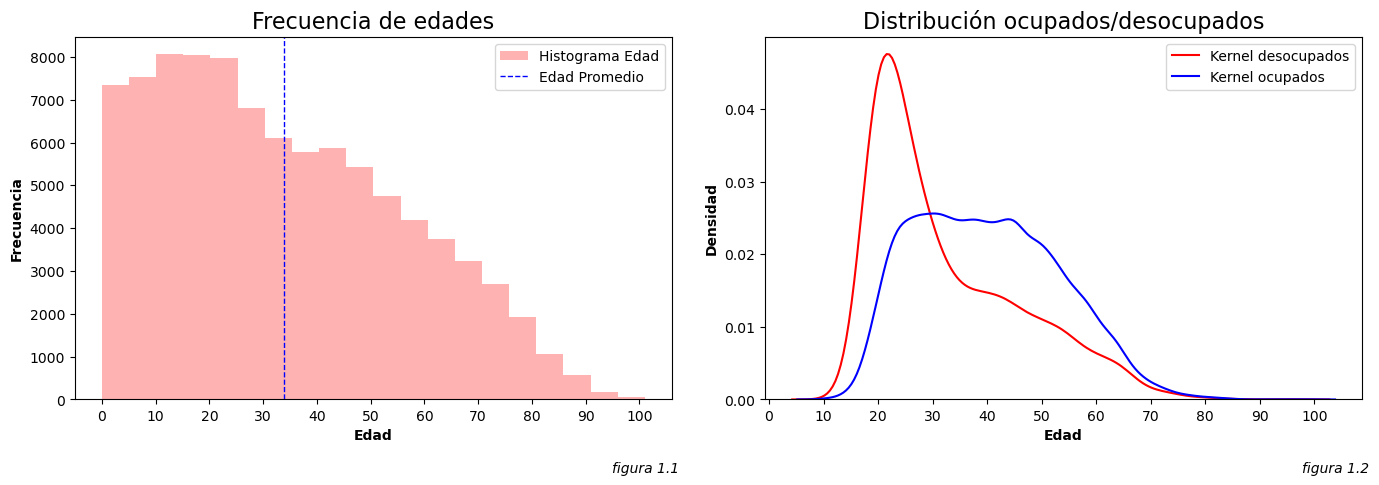

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#PARA QUE EL VALOR -1 = "MENOS DE UN AÑO CUMPLIDO" NO AFECTE AL HISTOGRAMA LO CAMBIO POR UN 0 (EDAD=0)
CH06_C = {
    -1:0
}
EPH_T1["CH06"] = EPH_T1["CH06"].replace(CH06_C)

plt.figure(figsize=(14,5))

#HISTOGRAMA
plt.subplot(1, 2, 1)
plt.hist(EPH_T1["CH06"], bins=20, alpha=0.3, color="red", label="Histograma Edad")
plt.xticks(np.arange(0, 110, 10))
plt.xlabel("Edad", fontweight="bold")
plt.ylabel("Frecuencia", fontweight="bold")
plt.title("Frecuencia de edades", fontsize=16)
EDAD_PROMEDIO = np.mean(EPH_T1["CH06"])
plt.text(0.9, -0.2, "figura 1.1", transform=plt.gca().transAxes, fontstyle="italic")
plt.axvline(EDAD_PROMEDIO, color="blue", linestyle="dashed", linewidth=1, label="Edad Promedio")
plt.legend()

#KERNELS

#ANTES CREO DOS DATAFRAME FILTRADOS POR ESTADO
EPH_T1_DESOCUPADOS = EPH_T1[EPH_T1["ESTADO"]==2]
EPH_T1_OCUPADOS = EPH_T1[EPH_T1["ESTADO"]==1]


#GRAFICO LOS KERNELS 
plt.subplot(1, 2, 2)
sns.kdeplot(data=EPH_T1_DESOCUPADOS, x="CH06", color="red", label="Kernel desocupados")
sns.kdeplot(data=EPH_T1_OCUPADOS, x="CH06", color="blue", label="Kernel ocupados")
plt.xticks(np.arange(0, 110, 10))
plt.xlabel("Edad", fontweight="bold")
plt.ylabel("Densidad", fontweight="bold")
plt.title("Distribución ocupados/desocupados", fontsize=16)
plt.text(0.9, -0.2, "figura 1.2", transform=plt.gca().transAxes, fontstyle="italic")

plt.legend()
plt.tight_layout()
plt.savefig("Figuras punto 1 1.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show()

# 2)

In [11]:
#JARDIN
EPH_T1.loc[(EPH_T1["CH12"] == 1) & (EPH_T1["CH13"] == 2), "EDUC"] = 0
EPH_T1.loc[(EPH_T1["CH12"] == 1) & (EPH_T1["CH13"] == 1), "EDUC"] = 0

#PRIMARIO
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0), "EDUC"] = 0
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna(), "EDUC"] = 0
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1), "EDUC"] = 1
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2), "EDUC"] = 2
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3), "EDUC"] = 3
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4), "EDUC"] = 4
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5), "EDUC"] = 5
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 6), "EDUC"] = 6
#PRIMARIO COMPLETO DEPENDE DE LA REGIÓN
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 1) & (EPH_T1["REGION"] == 1), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 1) & (EPH_T1["REGION"] == 40), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 1) & (EPH_T1["REGION"] == 41), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 1) & (EPH_T1["REGION"] == 42), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 1) & (EPH_T1["REGION"] == 43), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 2) & (EPH_T1["CH13"] == 1) & (EPH_T1["REGION"] == 44), "EDUC"] = 7

#EGB
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0), "EDUC"] = 0
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna(), "EDUC"] = 0
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1), "EDUC"] = 1
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2), "EDUC"] = 2
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3), "EDUC"] = 3
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4), "EDUC"] = 4
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5), "EDUC"] = 5
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 6), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 7), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 8), "EDUC"] = 8
EPH_T1.loc[(EPH_T1["CH12"] == 3) & (EPH_T1["CH13"] == 1), "EDUC"] = 9

#SECUNDARIO (si es incompleto va a depender de la región)
#NO TERMINÓ PRIMERO
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0) & (EPH_T1["REGION"] == 1), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0) & (EPH_T1["REGION"] == 40), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0) & (EPH_T1["REGION"] == 41), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0) & (EPH_T1["REGION"] == 42), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0) & (EPH_T1["REGION"] == 43), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0) & (EPH_T1["REGION"] == 44), "EDUC"] = 7

EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna() & (EPH_T1["REGION"] == 1), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna() & (EPH_T1["REGION"] == 40), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna() & (EPH_T1["REGION"] == 41), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna() & (EPH_T1["REGION"] == 42), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna() & (EPH_T1["REGION"] == 43), "EDUC"] = 6
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna() & (EPH_T1["REGION"] == 44), "EDUC"] = 7
#TERMINÓ PRIMERO
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1) & (EPH_T1["REGION"] == 1), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1) & (EPH_T1["REGION"] == 40), "EDUC"] = 8
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1) & (EPH_T1["REGION"] == 41), "EDUC"] = 8
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1) & (EPH_T1["REGION"] == 42), "EDUC"] = 8
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1) & (EPH_T1["REGION"] == 43), "EDUC"] = 7
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1) & (EPH_T1["REGION"] == 44), "EDUC"] = 8
#TERMINÓ SEGUNDO
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2) & (EPH_T1["REGION"] == 1), "EDUC"] = 8
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2) & (EPH_T1["REGION"] == 40), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2) & (EPH_T1["REGION"] == 41), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2) & (EPH_T1["REGION"] == 42), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2) & (EPH_T1["REGION"] == 43), "EDUC"] = 8
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2) & (EPH_T1["REGION"] == 44), "EDUC"] = 9
#TERMINÓ TERCERO
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3) & (EPH_T1["REGION"] == 1), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3) & (EPH_T1["REGION"] == 40), "EDUC"] = 10
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3) & (EPH_T1["REGION"] == 41), "EDUC"] = 10
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3) & (EPH_T1["REGION"] == 42), "EDUC"] = 10
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3) & (EPH_T1["REGION"] == 43), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3) & (EPH_T1["REGION"] == 44), "EDUC"] = 10
#TERMINÓ CUARTO
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4) & (EPH_T1["REGION"] == 1), "EDUC"] = 10
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4) & (EPH_T1["REGION"] == 40), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4) & (EPH_T1["REGION"] == 41), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4) & (EPH_T1["REGION"] == 42), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4) & (EPH_T1["REGION"] == 43), "EDUC"] = 10
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4) & (EPH_T1["REGION"] == 44), "EDUC"] = 11
#TERMINÓ QUINTO (englobo a todos los que no terminaron el ultimo año) 
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5) & (EPH_T1["REGION"] == 1), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5) & (EPH_T1["REGION"] == 40), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5) & (EPH_T1["REGION"] == 41), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5) & (EPH_T1["REGION"] == 42), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5) & (EPH_T1["REGION"] == 43), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5) & (EPH_T1["REGION"] == 44), "EDUC"] = 11
#SECUNDARIO COMPLETO
EPH_T1.loc[(EPH_T1["CH12"] == 4) & (EPH_T1["CH13"] == 1), "EDUC"] = 12

#POLIMODAL
EPH_T1.loc[(EPH_T1["CH12"] == 5) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 5) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna(), "EDUC"] = 9
EPH_T1.loc[(EPH_T1["CH12"] == 5) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1), "EDUC"] = 10
EPH_T1.loc[(EPH_T1["CH12"] == 5) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2), "EDUC"] = 11
EPH_T1.loc[(EPH_T1["CH12"] == 5) & (EPH_T1["CH13"] == 1), "EDUC"] = 12

#TERCIARIO
EPH_T1.loc[(EPH_T1["CH12"] == 6) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0), "EDUC"] = 12
EPH_T1.loc[(EPH_T1["CH12"] == 6) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna(), "EDUC"] = 12
EPH_T1.loc[(EPH_T1["CH12"] == 6) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1), "EDUC"] = 13
EPH_T1.loc[(EPH_T1["CH12"] == 6) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2), "EDUC"] = 14
EPH_T1.loc[(EPH_T1["CH12"] == 6) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3), "EDUC"] = 15
EPH_T1.loc[(EPH_T1["CH12"] == 6) & (EPH_T1["CH13"] == 1), "EDUC"] = 16

#UNIVERSITARIO
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0), "EDUC"] = 12
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna(), "EDUC"] = 12
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1), "EDUC"] = 13
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2), "EDUC"] = 14
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 3), "EDUC"] = 15
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 4), "EDUC"] = 16
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 5), "EDUC"] = 17
EPH_T1.loc[(EPH_T1["CH12"] == 7) & (EPH_T1["CH13"] == 1), "EDUC"] = 18

#POSGRADO UNIVERSITARIO
EPH_T1.loc[(EPH_T1["CH12"] == 8) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 0), "EDUC"] = 18
EPH_T1.loc[(EPH_T1["CH12"] == 8) & (EPH_T1["CH13"] == 2) & EPH_T1["CH14"].isna(), "EDUC"] = 18
EPH_T1.loc[(EPH_T1["CH12"] == 8) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 1), "EDUC"] = 19
EPH_T1.loc[(EPH_T1["CH12"] == 8) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] == 2), "EDUC"] = 20
EPH_T1.loc[(EPH_T1["CH12"] == 8) & (EPH_T1["CH13"] == 2) & (EPH_T1["CH14"] >= 3), "EDUC"] = 21
EPH_T1.loc[(EPH_T1["CH12"] == 8) & (EPH_T1["CH13"] == 1), "EDUC"] = 21

print("la cantidad de años de estudio premedio son", EPH_T1["EDUC"].mean().round())

la cantidad de años de estudio premedio son 9.0


# 3)

In [20]:
#AJUSTO INGRESOS DE 2004 POR INFLACION
EPH_T1.loc[EPH_T1["ANO4"] == 2004, "P21"] = EPH_T1["P21"] * 500

In [36]:
#REEMPLAZO LOS NS/NR POR NAN
EPH_T1["P21"] = EPH_T1["P21"].replace(-9, np.nan)

#CREO LA VARIABLE DE SALARIO_SEMANAL
EPH_T1["SALARIO_SEMANAL"] = EPH_T1["P21"] / 40

C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\1273127993.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=EPH_T1_DESOCUPADOS, x="SALARIO_SEMANAL", color="red", label="Kernel desocupados")


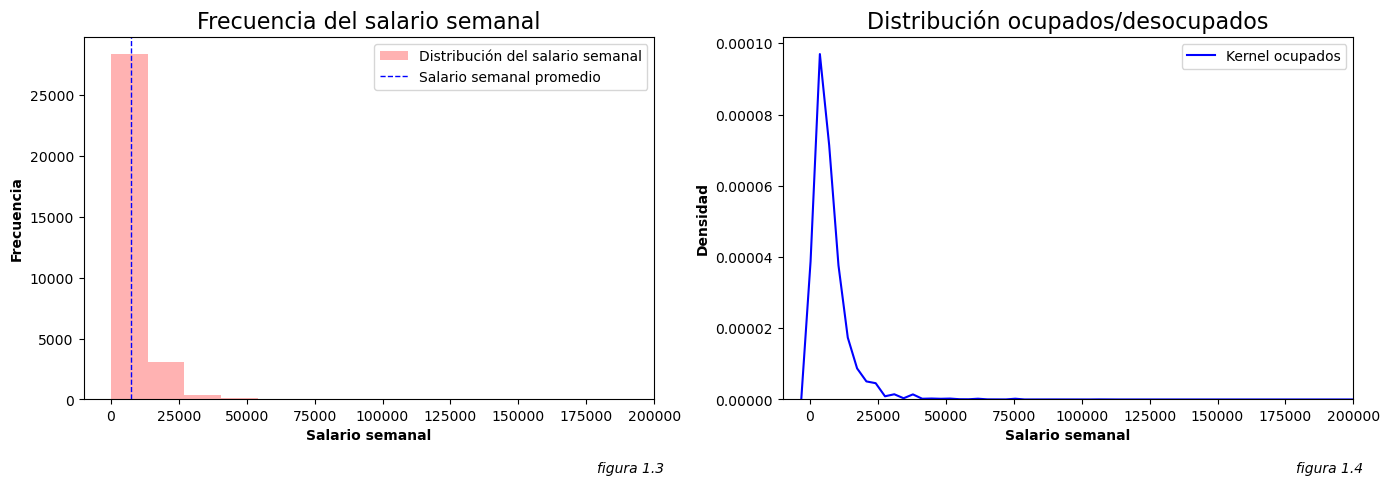

In [62]:
plt.figure(figsize=(14,5))

#HISTOGRAMA
plt.subplot(1, 2, 1)
plt.hist(EPH_T1["SALARIO_SEMANAL"], bins=50, alpha=0.3, color="red", label="Distribución del salario semanal")
plt.xlabel("Salario semanal", fontweight="bold")
plt.ylabel("Frecuencia", fontweight="bold")
plt.xlim(-10000, 200000)
plt.title("Frecuencia del salario semanal", fontsize=16)
SAL_SEM_PROMEDIO = np.mean(EPH_T1["SALARIO_SEMANAL"])
plt.text(0.9, -0.2, "figura 1.3", transform=plt.gca().transAxes, fontstyle="italic")
plt.axvline(SAL_SEM_PROMEDIO, color="blue", linestyle="dashed", linewidth=1, label="Salario semanal promedio")
plt.legend()

#KERNELS

#ANTES CREO DOS DATAFRAME FILTRADOS POR ESTADO
EPH_T1_DESOCUPADOS = EPH_T1[EPH_T1["ESTADO"]==2]
EPH_T1_OCUPADOS = EPH_T1[EPH_T1["ESTADO"]==1]


#GRAFICO LOS KERNELS 
plt.subplot(1, 2, 2)
sns.kdeplot(data=EPH_T1_DESOCUPADOS, x="SALARIO_SEMANAL", color="red", label="Kernel desocupados")
sns.kdeplot(data=EPH_T1_OCUPADOS, x="SALARIO_SEMANAL", color="blue", label="Kernel ocupados")
plt.xlim(-10000, 200000)
plt.xlabel("Salario semanal", fontweight="bold")
plt.ylabel("Densidad", fontweight="bold")
plt.title("Distribución ocupados/desocupados", fontsize=16)
plt.text(0.9, -0.2, "figura 1.4", transform=plt.gca().transAxes, fontstyle="italic")

plt.legend()
plt.tight_layout()
plt.savefig("Figuras punto 1 3.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show()

# 4)

In [72]:
#REEMPLAZO LOS NAN DE PP3F_TOT POR 0s
EPH_T1["PP3F_TOT"] = EPH_T1["PP3F_TOT"].replace(np.nan, 0)

#CREO LA VARIABLE DE HORAS TRABAJADAS
EPH_T1["HORASTRAB"] = EPH_T1["PP3E_TOT"] + EPH_T1["PP3F_TOT"]

# 5)

In [141]:
#FILTRO POR REGIÓN PAMPEANA
EPH_PAMPA_T1 = EPH_T1[EPH_T1["REGION"]==43]

#CAMBIO LOS NAN POR 0s PARA PODER CONTARLOS
EPH_PAMPA_T1["ESTADO"] = EPH_PAMPA_T1["ESTADO"].fillna(0)

#FILTRO POR AÑOS
EPH_PAMPA_T1_2004 = EPH_PAMPA_T1[EPH_PAMPA_T1["ANO4"]==2004]
EPH_PAMPA_T1_2024 = EPH_PAMPA_T1[EPH_PAMPA_T1["ANO4"]==2024]

C:\Users\Computador\AppData\Local\Temp\ipykernel_5896\3783859002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH_PAMPA_T1["ESTADO"] = EPH_PAMPA_T1["ESTADO"].fillna(0)


In [239]:
#CREO LA TABLA
TAMBLA_RESUMEN = pd.DataFrame({"2004":["-","-","-","-","-"],
                              "2024":["-","-","-","-","-"],
                              "Total":["-","-","-","-","-"],})

indice = ["Cantidad observaciones","Cantidad de observaciones con Nas en la variable Estado",
                                         "Cantidad de Ocupados","Cantidad de Desocupados",
                                         "Cantidad de variables limpias y homogeneizadas"]


TAMBLA_RESUMEN.index = indice

In [277]:
#COMPLETO CADA COLUMNA DE LA TABLA
TAMBLA_RESUMEN.loc["Cantidad observaciones", "2004"] = len(EPH_PAMPA_T1_2004)
TAMBLA_RESUMEN.loc["Cantidad observaciones", "2024"] = len(EPH_PAMPA_T1_2024)
TAMBLA_RESUMEN.loc["Cantidad observaciones", "Total"] = len(EPH_PAMPA_T1)

TAMBLA_RESUMEN.loc["Cantidad de observaciones con Nas en la variable Estado", "2004"] = (EPH_PAMPA_T1_2004["ESTADO"]==0).sum()
TAMBLA_RESUMEN.loc["Cantidad de observaciones con Nas en la variable Estado", "2024"] = (EPH_PAMPA_T1_2024["ESTADO"]==0).sum()
TAMBLA_RESUMEN.loc["Cantidad de observaciones con Nas en la variable Estado", "Total"] = (EPH_PAMPA_T1["ESTADO"]==0).sum()

TAMBLA_RESUMEN.loc["Cantidad de Ocupados", "2004"] = (EPH_PAMPA_T1_2004["ESTADO"]==1).sum()
TAMBLA_RESUMEN.loc["Cantidad de Ocupados", "2024"] = (EPH_PAMPA_T1_2024["ESTADO"]==1).sum()
TAMBLA_RESUMEN.loc["Cantidad de Ocupados", "Total"] = (EPH_PAMPA_T1["ESTADO"]==1).sum()

TAMBLA_RESUMEN.loc["Cantidad de Desocupados", "2004"] = (EPH_PAMPA_T1_2004["ESTADO"]==2).sum()
TAMBLA_RESUMEN.loc["Cantidad de Desocupados", "2024"] = (EPH_PAMPA_T1_2024["ESTADO"]==2).sum()
TAMBLA_RESUMEN.loc["Cantidad de Desocupados", "Total"] = (EPH_PAMPA_T1["ESTADO"]==2).sum()

TAMBLA_RESUMEN.loc["Cantidad de variables limpias y homogeneizadas", "2004"] = T1_04_comun.shape[1] + 4 
TAMBLA_RESUMEN.loc["Cantidad de variables limpias y homogeneizadas", "2024"] = T1_24_comun.shape[1] + 4
TAMBLA_RESUMEN.loc["Cantidad de variables limpias y homogeneizadas", "Total"] = T1_ARG.shape[1] + 4
#SUMO 4 POR LAS 4 VARIABLES NUEVAS

#EXPORTO LA TABLA
TAMBLA_RESUMEN.to_excel("Tabla punto 5.xlsx")
TAMBLA_RESUMEN

,2004,2024,Total
Cantidad observaciones,14821,14410,29231
Cantidad de observaciones con Nas en la variable Estado,12,15,27
Cantidad de Ocupados,5682,6302,11984
Cantidad de Desocupados,1035,453,1488
Cantidad de variables limpias y homogeneizadas,176,176,176
